In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

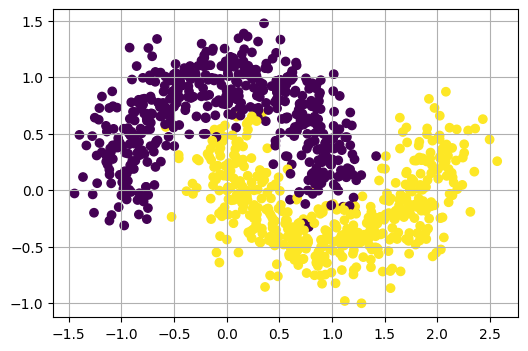

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 1000, noise = 0.2, random_state = 42)

plt.figure(figsize = (6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg.fit(X, y)
y_pred_lr = log_reg.predict(X)
acc_lr = accuracy_score(y, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr*100:.2f}%")

Logistic Regression Accuracy: 86.80%


In [ ]:
def plot_decision_boundary(model_func, X, y, title):
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5 # Corrected y_min and y_max
  h = 0.02
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # Corrected meshgrid ranges
  grid = np.c_[xx.ravel(), yy.ravel()]
  Z = model_func(grid)
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
  plt.title(title)
  plt.show()

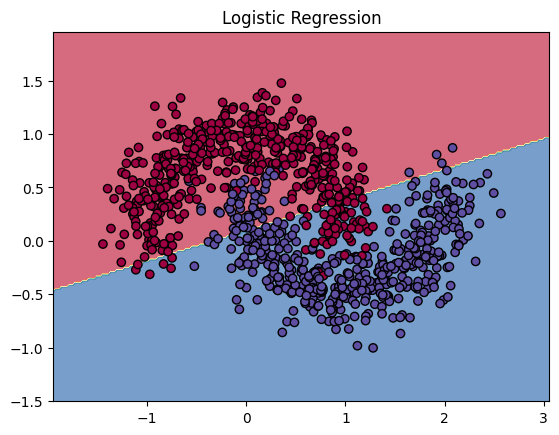

In [ ]:
plot_decision_boundary(lambda x: log_reg.predict(x), X, y, "Logistic Regression")

In [ ]:
input_size = 2
hidden_size1 = 10
hidden_size2 = 10
output_size = 1
lr = 0.1
epochs = 10000

In [ ]:
W1 = np.random.randn(input_size, hidden_size1) * 0.01
b1 = np.zeros((1, hidden_size1))
W2 = np.random.randn(hidden_size1, output_size) * 0.01
b2 = np.zeros((1, output_size))

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x):
  return x * (1 - x)
def relu(x):
  return np.maximum(0, x)
def relu_deriv(x):
  return (x > 0).astype(float)

In [ ]:
for epoch in range(epochs):
  # Forward propagation
  z1 = np.dot(X, W1) + b1
  a1 = relu(z1)
  z2 = np.dot(a1, W2) + b2
  a2 = sigmoid(z2)

  # Loss
  loss = -np.mean(y * np.log(a2 + 1e-8) + (1 - y) * np.log(1 - a2 + 1e-8))

  # Backward propagation
  d_a2 = a2 - y.reshape(-1, 1)
  d_W2 = np.dot(a1.T, d_a2) / len(X)
  d_b2 = np.mean(d_a2, axis=0, keepdims=True)
  d_a1 = np.dot(d_a2, W2.T) * relu_deriv(a1)
  d_W1 = np.dot(X.T, d_a1) / len(X)
  d_b1 = np.mean(d_a1, axis=0, keepdims=True)

  # Gradient descent update
  W1 -= lr * d_W1
  b1 -= lr * d_b1
  W2 -= lr * d_W2
  b2 -= lr * d_b2

  if epoch % 2000 == 0:
    print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.6931
Epoch 2000, Loss: 1.5099
Epoch 4000, Loss: 1.5173
Epoch 6000, Loss: 1.5193
Epoch 8000, Loss: 1.5207


In [ ]:
a1 = relu(np.dot(X, W1) + b1)
a2 = sigmoid(np.dot(a1, W2) + b2)
y_pred_nn = (a2 > 0.5).astype(int).flatten()
acc_nn = accuracy_score(y, y_pred_nn)
print(f"Neural Network Accuracy: {acc_nn*100:.2f}%")

Neural Network Accuracy: 87.10%


In [ ]:
W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size1))

W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2 / hidden_size1)
b2 = np.zeros((1, hidden_size2))

W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2 / hidden_size2)
b3 = np.zeros((1, output_size))

In [ ]:
for epoch in range(epochs):
  # For sigmoid propagation
  z1 = np.dot(X, W1) + b1
  a1 = relu(z1)

  z2 = np.dot(a1, W2) + b2
  a2 = relu(z2)

  z3 = np.dot(a2, W3) + b3
  a3 = sigmoid(z3)

  # Loss
  loss = -np.mean(y * np.log(a3 + 1e-8) + (1 - y) * np.log(1 - a3 + 1e-8))

  # Backward propagation
  d_a3 = a3 - y.reshape(-1, 1)
  d_W3 = np.dot(a2.T, d_a3) / len(X)
  d_b3 = np.mean(d_a3, axis=0, keepdims=True)

  d_a2 = np.dot(d_a3, W3.T) * relu_deriv(a2)
  d_W2 = np.dot(a1.T, d_a2) / len(X)
  d_b2 = np.mean(d_a2, axis=0, keepdims=True)

  d_a1 = np.dot(d_a2, W2.T) * relu_deriv(a1)
  d_W1 = np.dot(X.T, d_a1) / len(X)
  d_b1 = np.mean(d_a1, axis=0, keepdims=True)

  # Gradient descent update
  W1 -= lr * d_W1
  b1 -= lr * d_b1
  W2 -= lr * d_W2
  b2 -= lr * d_b2
  W3 -= lr * d_W3
  b3 -= lr * d_b3

  if epoch % 2000 == 0:
    print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.7363
Epoch 2000, Loss: 3.3557
Epoch 4000, Loss: 3.9781
Epoch 6000, Loss: 4.2631
Epoch 8000, Loss: 4.4418


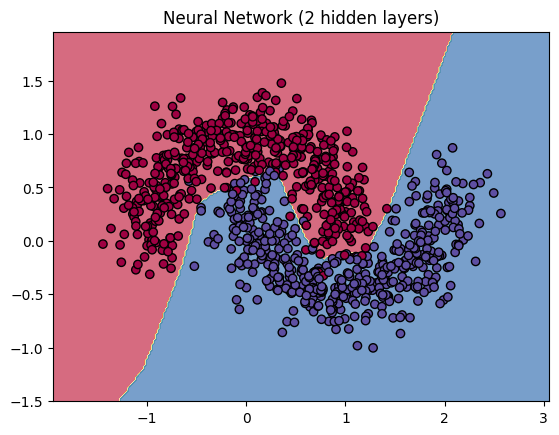

In [ ]:
def nn_predict(X):
  a1 = relu(np.dot(X, W1) + b1)
  a2 = relu(np.dot(a1, W2) + b2)
  a3 = sigmoid(np.dot(a2, W3) + b3)
  return (a3 > 0.5).astype(int).flatten()

plot_decision_boundary(nn_predict, X, y, "Neural Network (2 hidden layers)")